In [1]:
import pandas as pd #importing Pandas library to perform data and file operations

In [2]:
dataset=pd.read_csv("insurance_pre.csv") #loading data from CSV file to dataset variable

In [3]:
dataset


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)


In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
ind_var=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]#assigning the data from yearsExperience(independent variable/input) column to variable
dep_var=dataset[['charges']]#assigning the data from Salary(dependent variable/output) column to variable



In [8]:
ind_var

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [9]:
dep_var

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [10]:
import matplotlib.pyplot as plt 
#importing matplotlib library to perform chart operations

In [11]:
from sklearn.model_selection import train_test_split #importing scikit library to perform ML operations
X_train,X_test,Y_train,Y_test=train_test_split(ind_var,dep_var,test_size=0.20,random_state=0)
#calling the function to split train and test set and assigning their output to respective training and testing variables

In [12]:
X_test


,age,bmi,children,sex_male,smoker_yes
578,52,30.200,1,True,False
610,47,29.370,1,False,False
569,48,40.565,2,True,True
1034,61,38.380,0,True,False
198,51,18.050,0,False,False
...,...,...,...,...,...
1084,62,30.495,2,False,False
726,41,28.405,1,True,False
1132,57,40.280,0,True,False
725,30,39.050,3,False,True


In [13]:
from sklearn.linear_model import LinearRegression #importing LinearRegression class to train the model using MLR algorithm
regressor=LinearRegression()#creating instance for the class
regressor.fit(X_train,Y_train)#training the model by giving training set as input

LinearRegression()

In [14]:
regressor.coef_# this is the weight in y=wx+b


array([[ 2.54952280e+02,  3.20693337e+02,  4.30809389e+02,
        -2.34557931e+01,  2.35890247e+04]])

In [15]:
regressor.intercept_#this the bias in y=wx+b

array([-11901.10455877])

In [16]:
Y_pred=regressor.predict(X_test)#running the trained model over test set and getting predicted output

In [19]:
from sklearn.metrics import r2_score#importing the metrics library to do evaluations operations
r_score=r2_score(Y_test,Y_pred)#finding the R^2 (R square)

In [20]:
r_score#if R2 is nearer to 1 then model is good

0.7978644236809905

In [21]:
from sklearn.svm import SVR
svm_regressor=SVR(kernel="linear",C=1000)
svm_regressor=svm_regressor.fit(X_train,Y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
Y_pred=svm_regressor.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r_score_svm=r2_score(Y_test,Y_pred)

In [24]:
r_score_svm


0.6666895715319822

In [25]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor=DecisionTreeRegressor()
DT_regressor=DT_regressor.fit(X_train,Y_train)

In [26]:
Y_pred=DT_regressor.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r_score_DT=r2_score(Y_test,Y_pred)

In [29]:
r_score_DT

0.7393310154695854

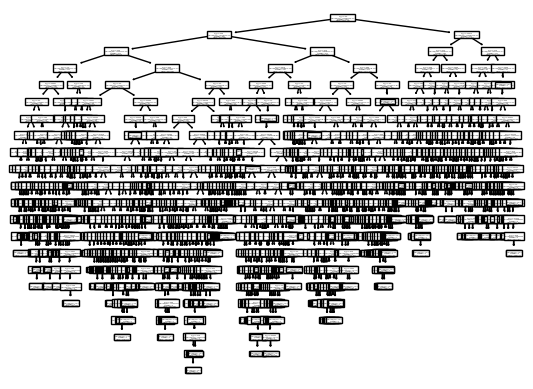

In [31]:
from sklearn import tree
tree.plot_tree(DT_regressor)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor=RandomForestRegressor(n_estimators=100, random_state=0)
RF_regressor.fit(X_train,Y_train)

C:\Anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [52]:
Y_pred=RF_regressor.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r_score_DT=r2_score(Y_test,Y_pred)

In [54]:
r_score_DT

0.8732371023891337

In [55]:
import pickle as pk
filename="RF_model_insurance_prediction.sav"
pk.dump(RF_regressor,open(filename,'wb'))#savinf the model under the given filename

In [56]:
saved_model=pk.load(open(filename,'rb'))#loading the model

In [57]:
insurance=saved_model.predict([[5000,2000,100,1,1]])#predicting the profit using the trained model

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
insurance

array([55724.6135148])